In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn


In [2]:
data = pd.read_csv("/content/sample_data/diabetes (1).csv")

In [3]:
df = pd.DataFrame(data)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


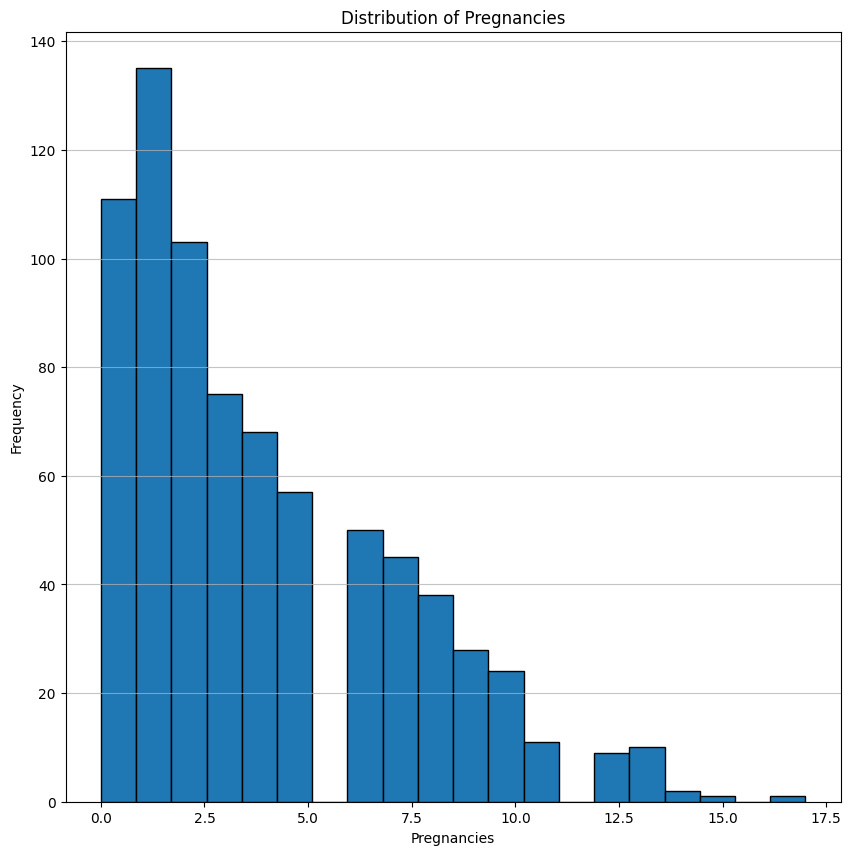

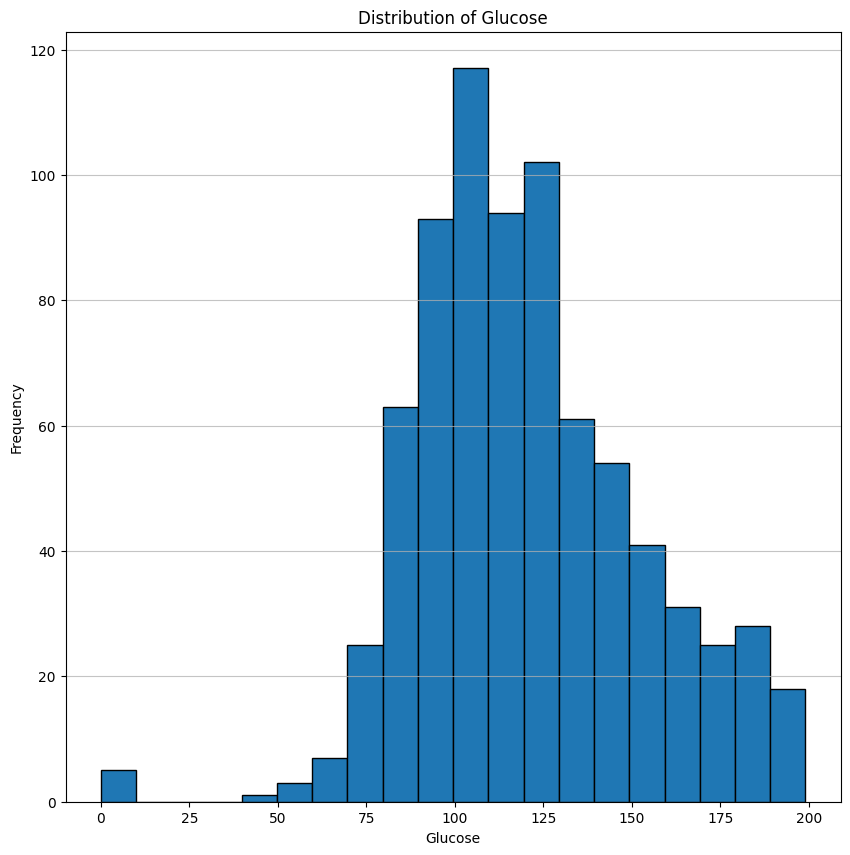

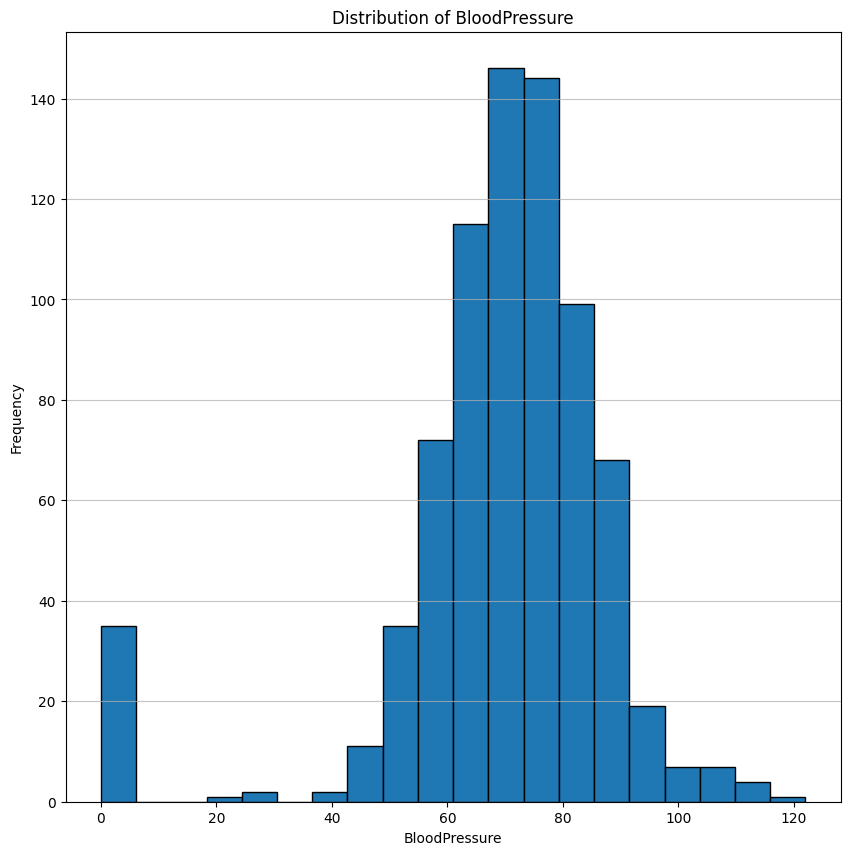

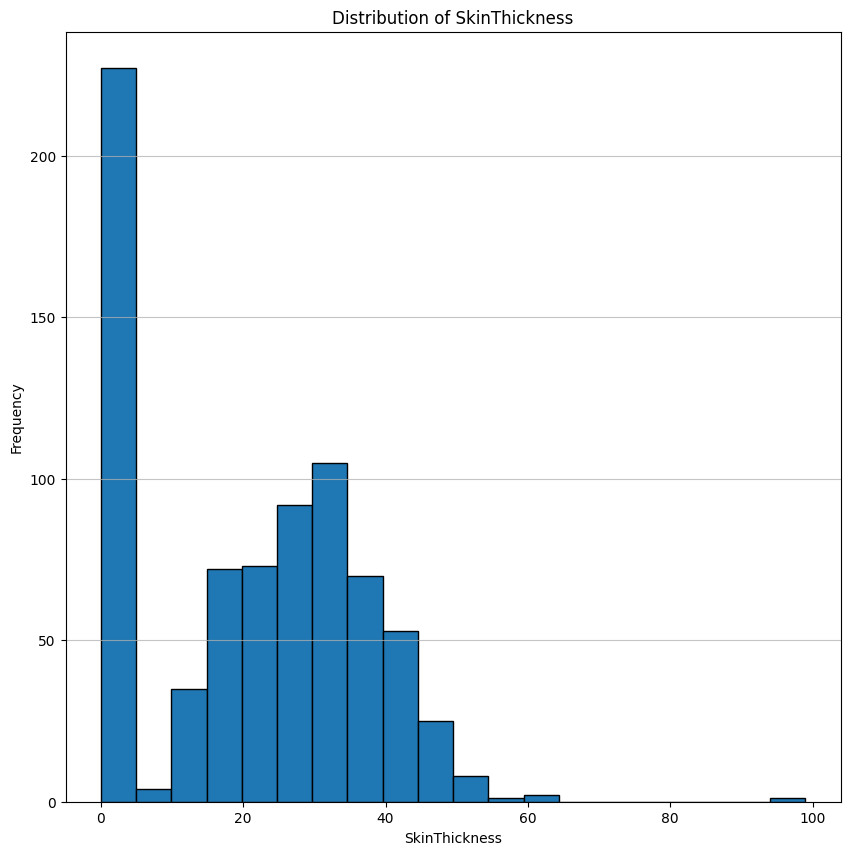

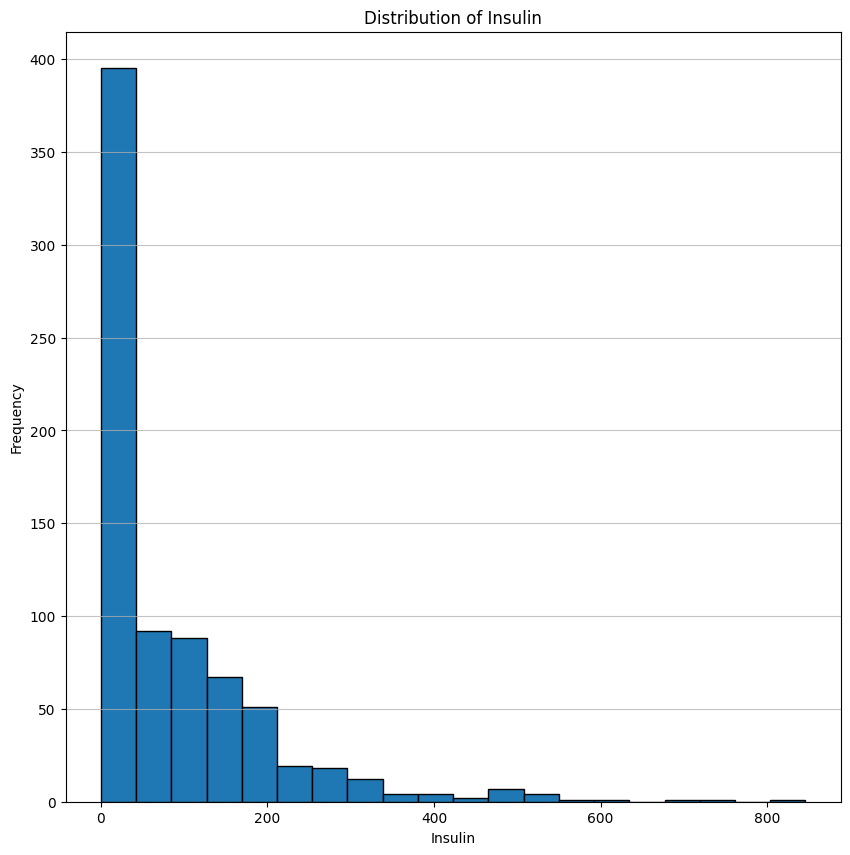

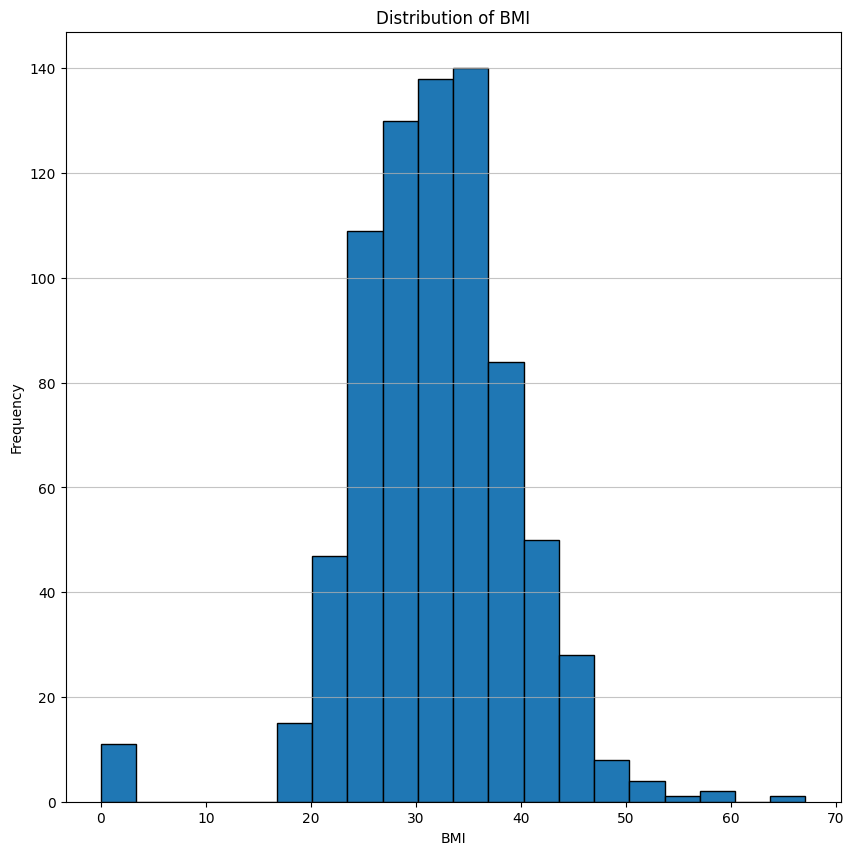

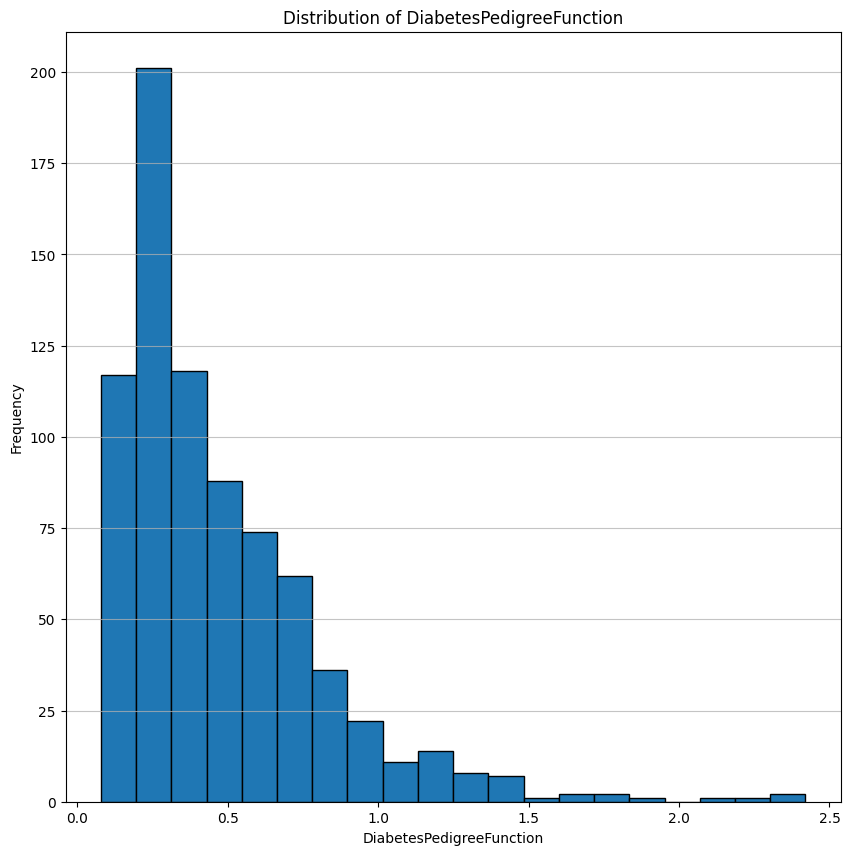

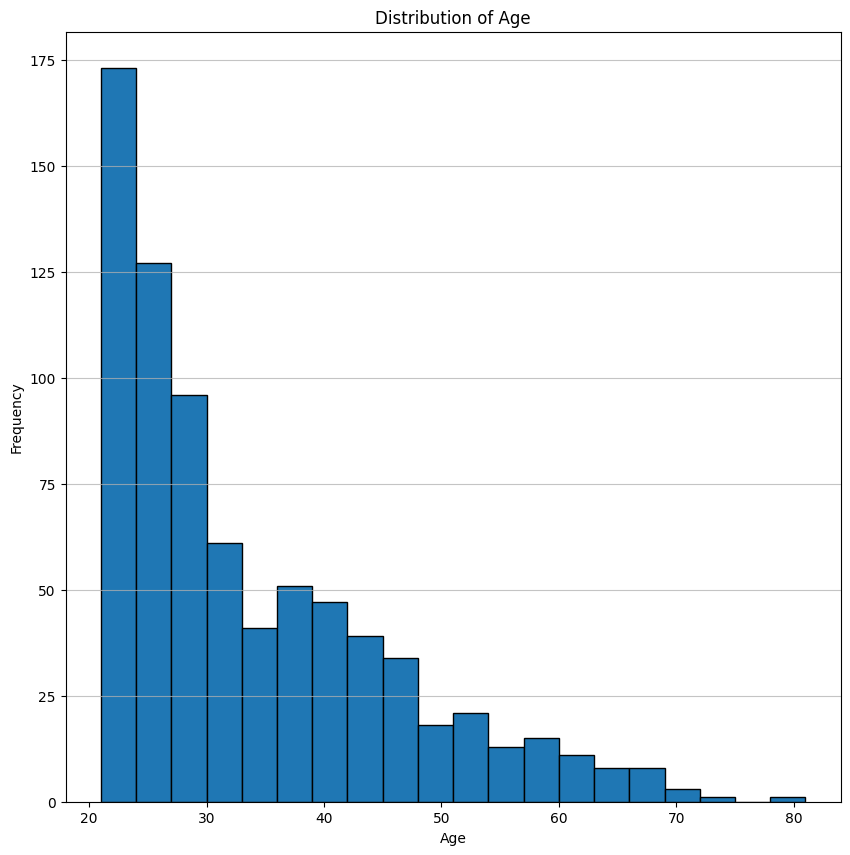

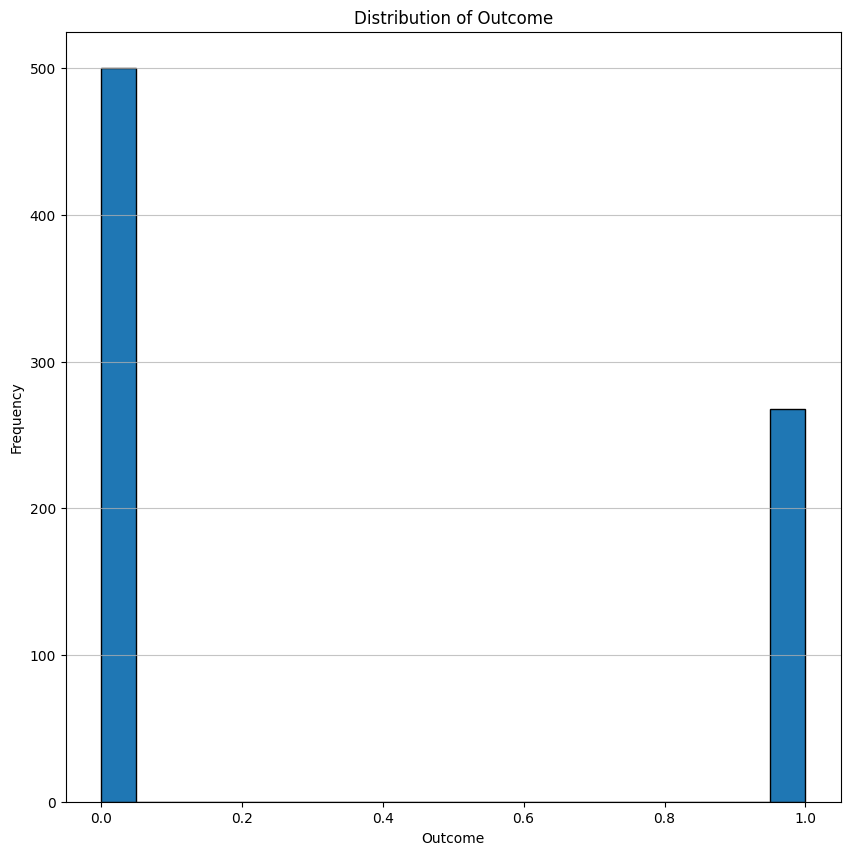

In [9]:
#Visualization of Histogram
for col in df.columns:
  plt.figure(figsize=(10,10))
  plt.hist(df[col],bins=20, edgecolor = 'black')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.grid(axis='y', alpha=0.75)
  plt.show()




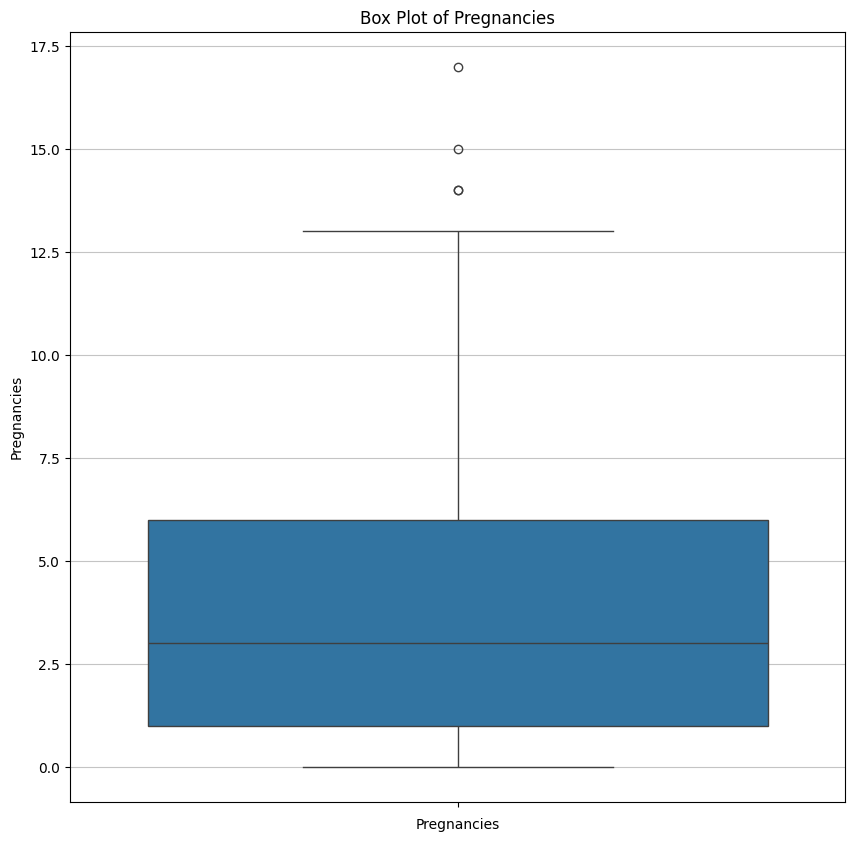

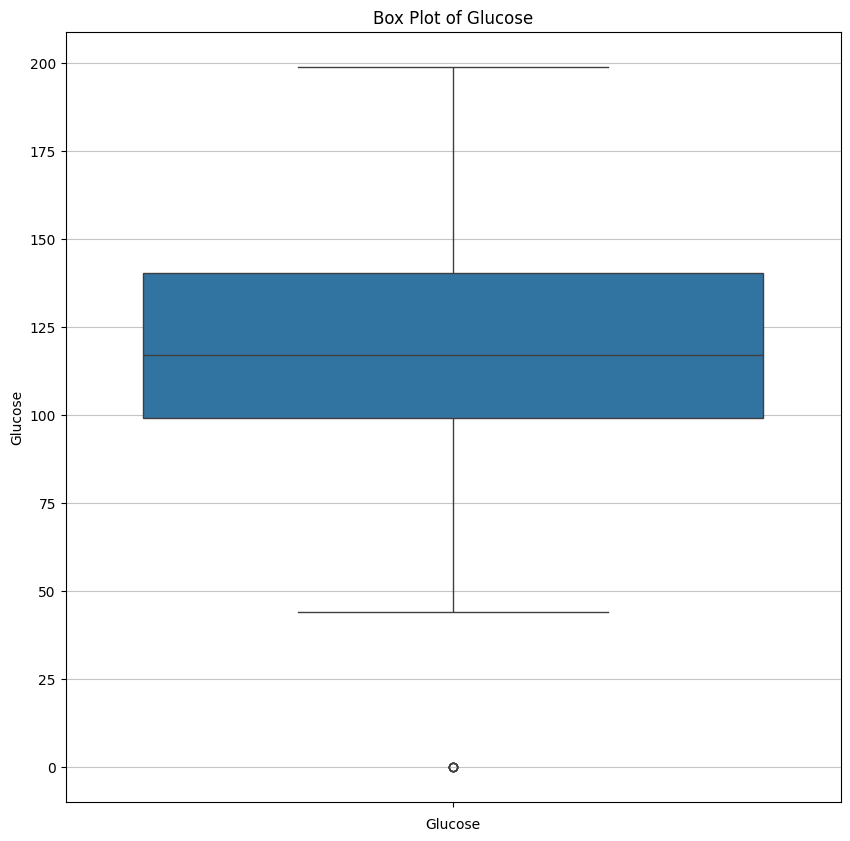

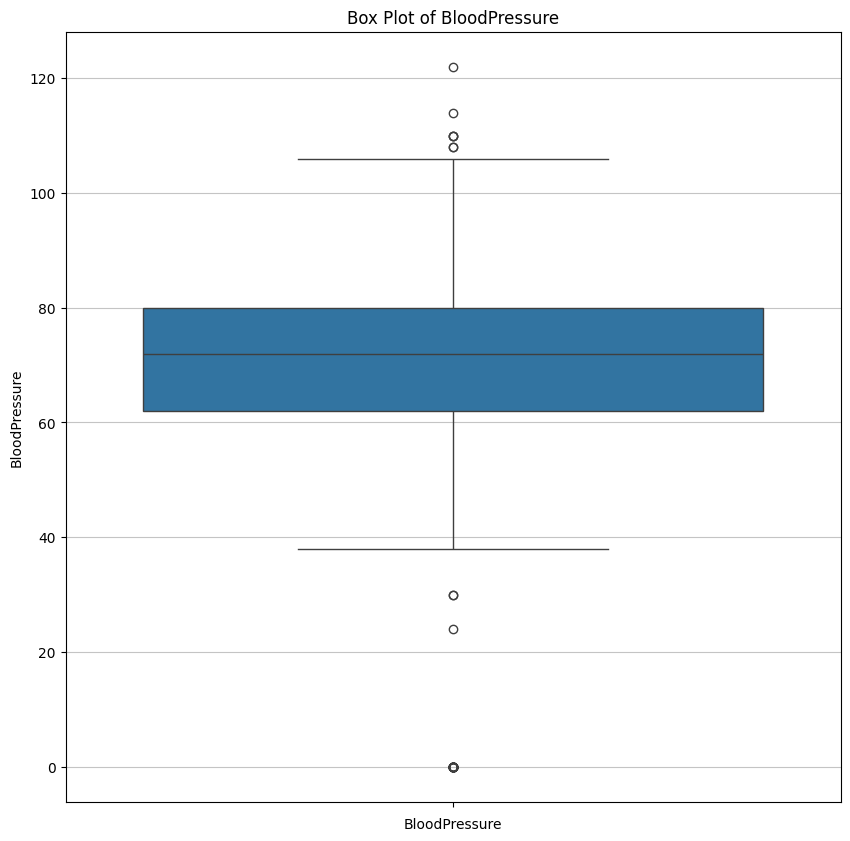

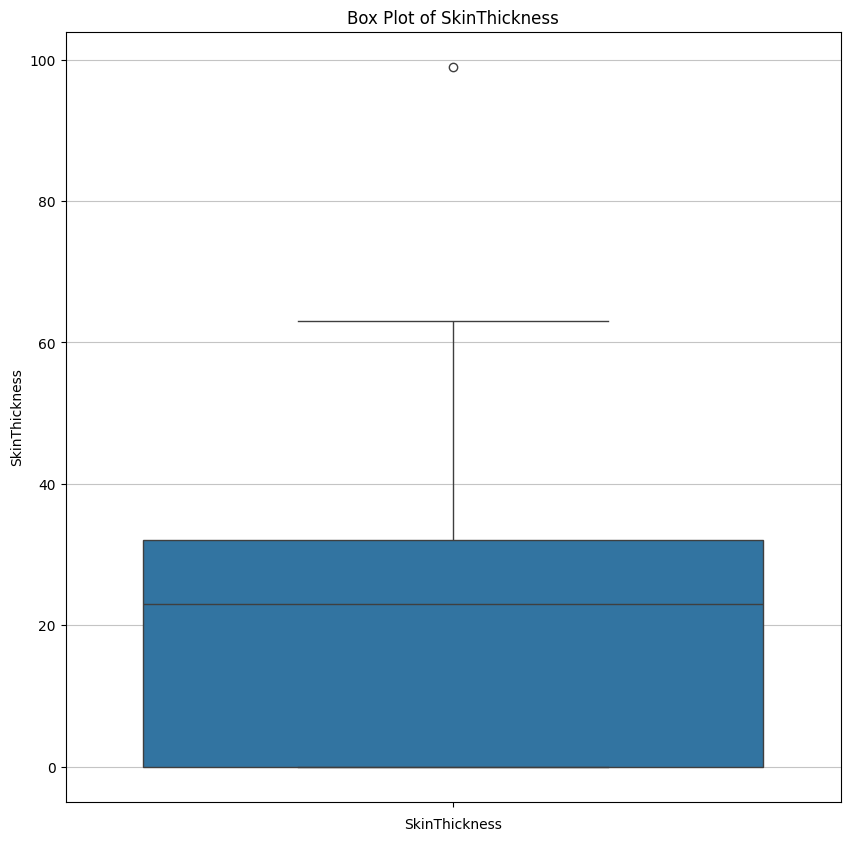

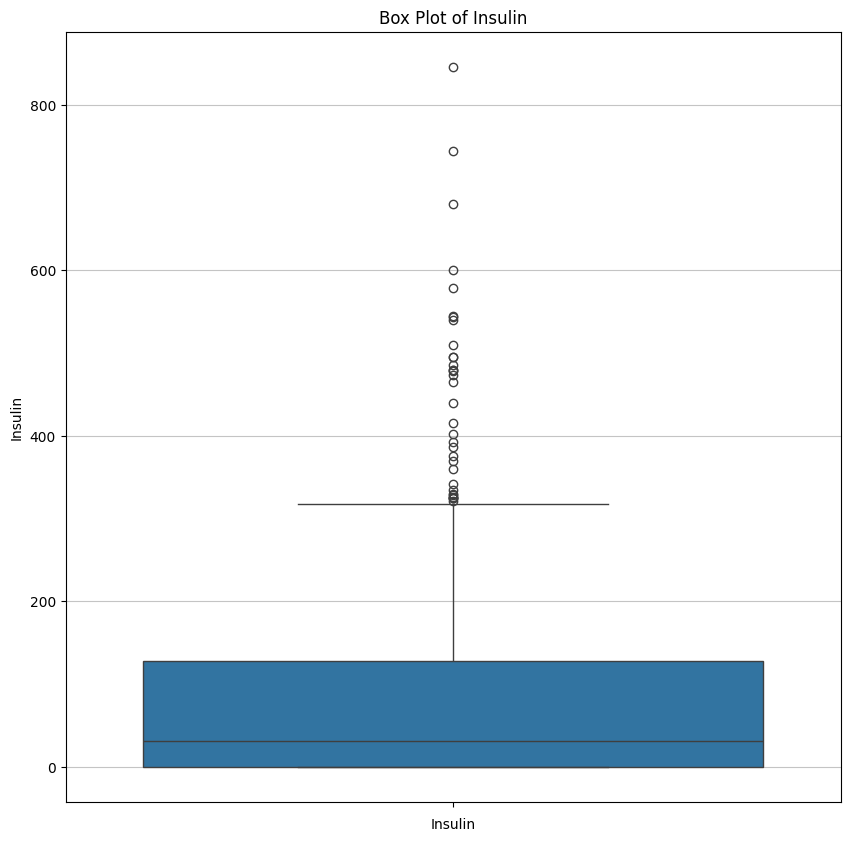

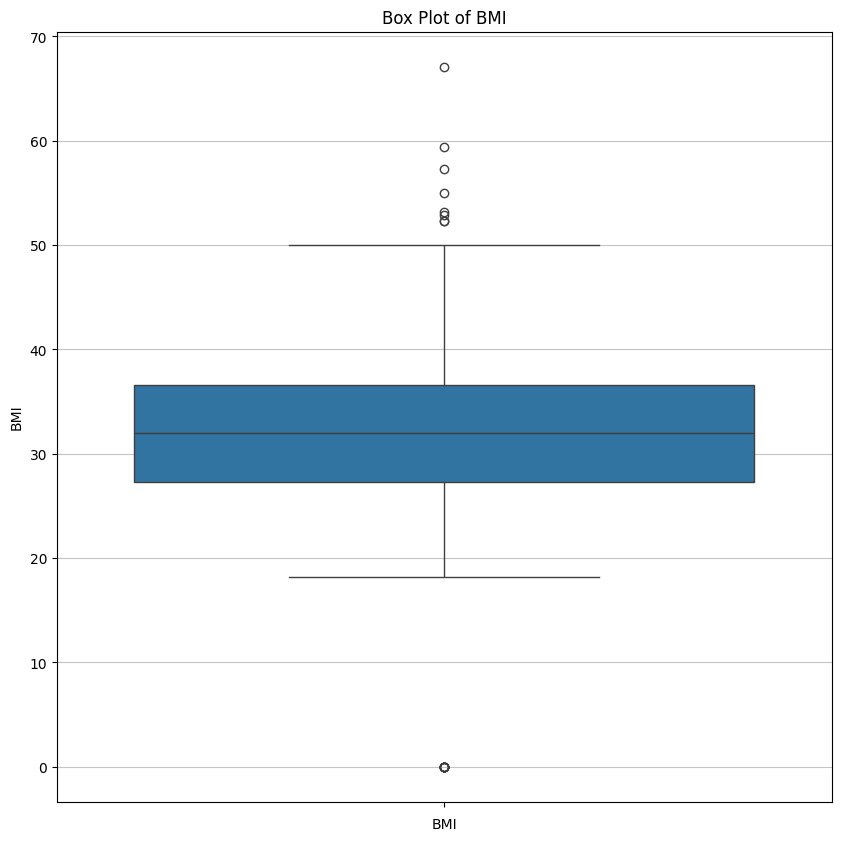

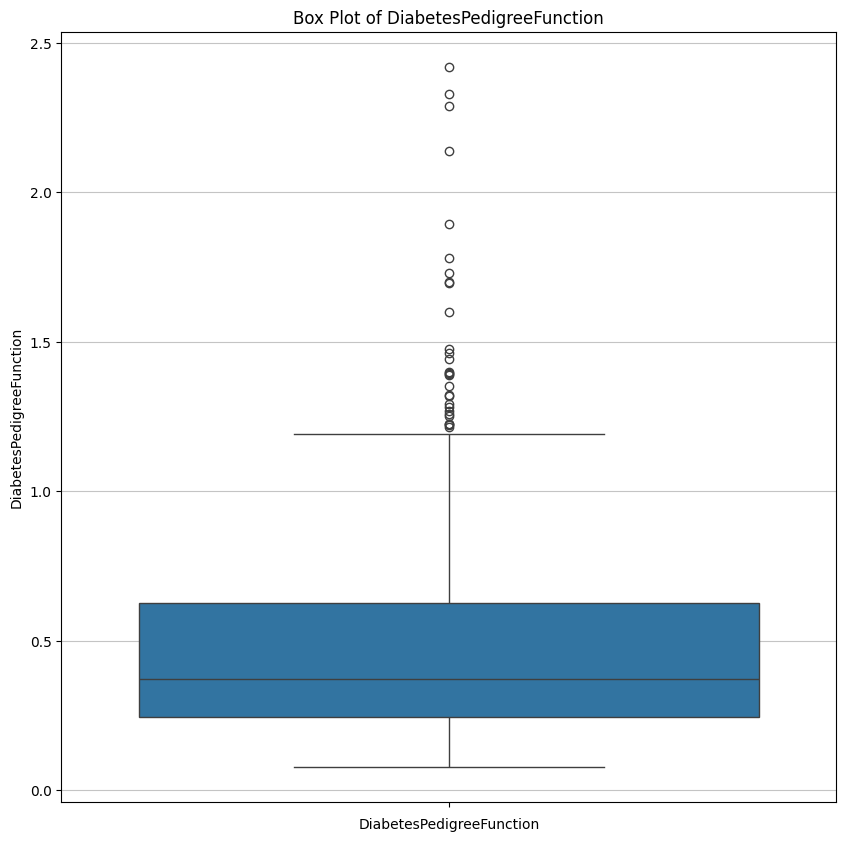

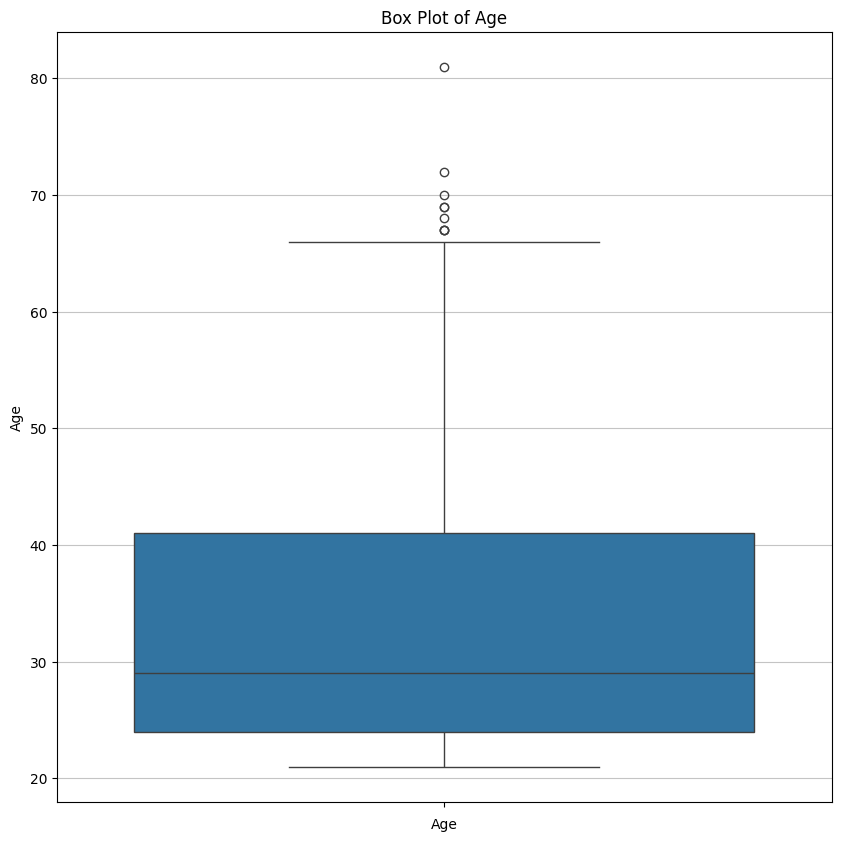

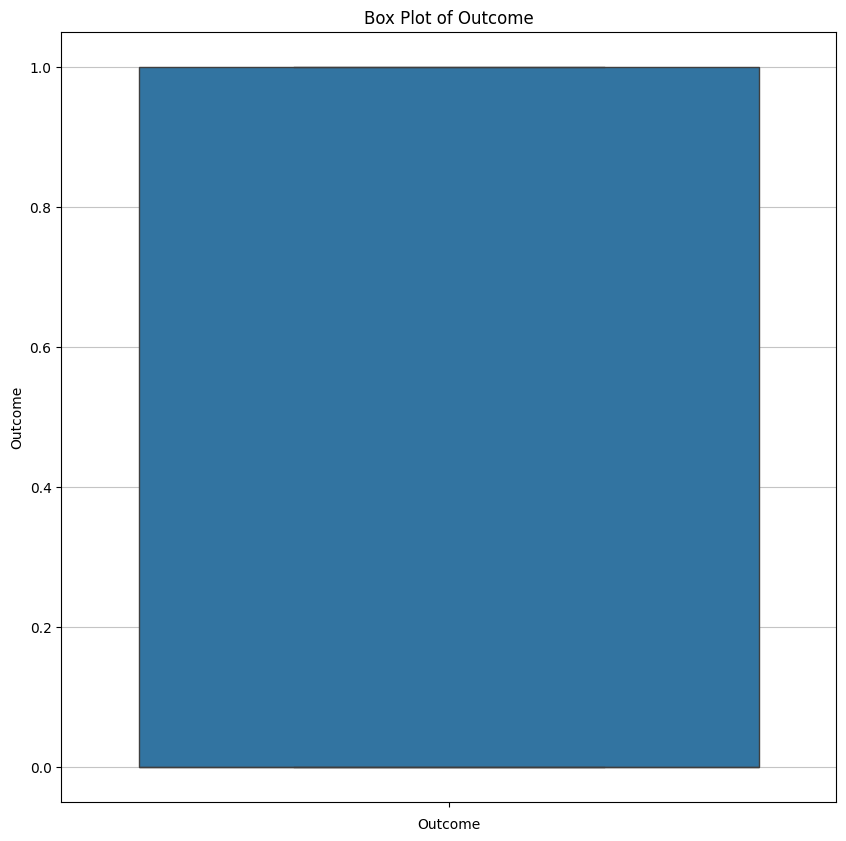

In [10]:
#Visualization of Box Plot
for col in df.columns:
  plt.figure(figsize=(10,10))
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.title(f'Box Plot of {col}')
  plt.grid(axis='y', alpha=0.75)
  plt.show()


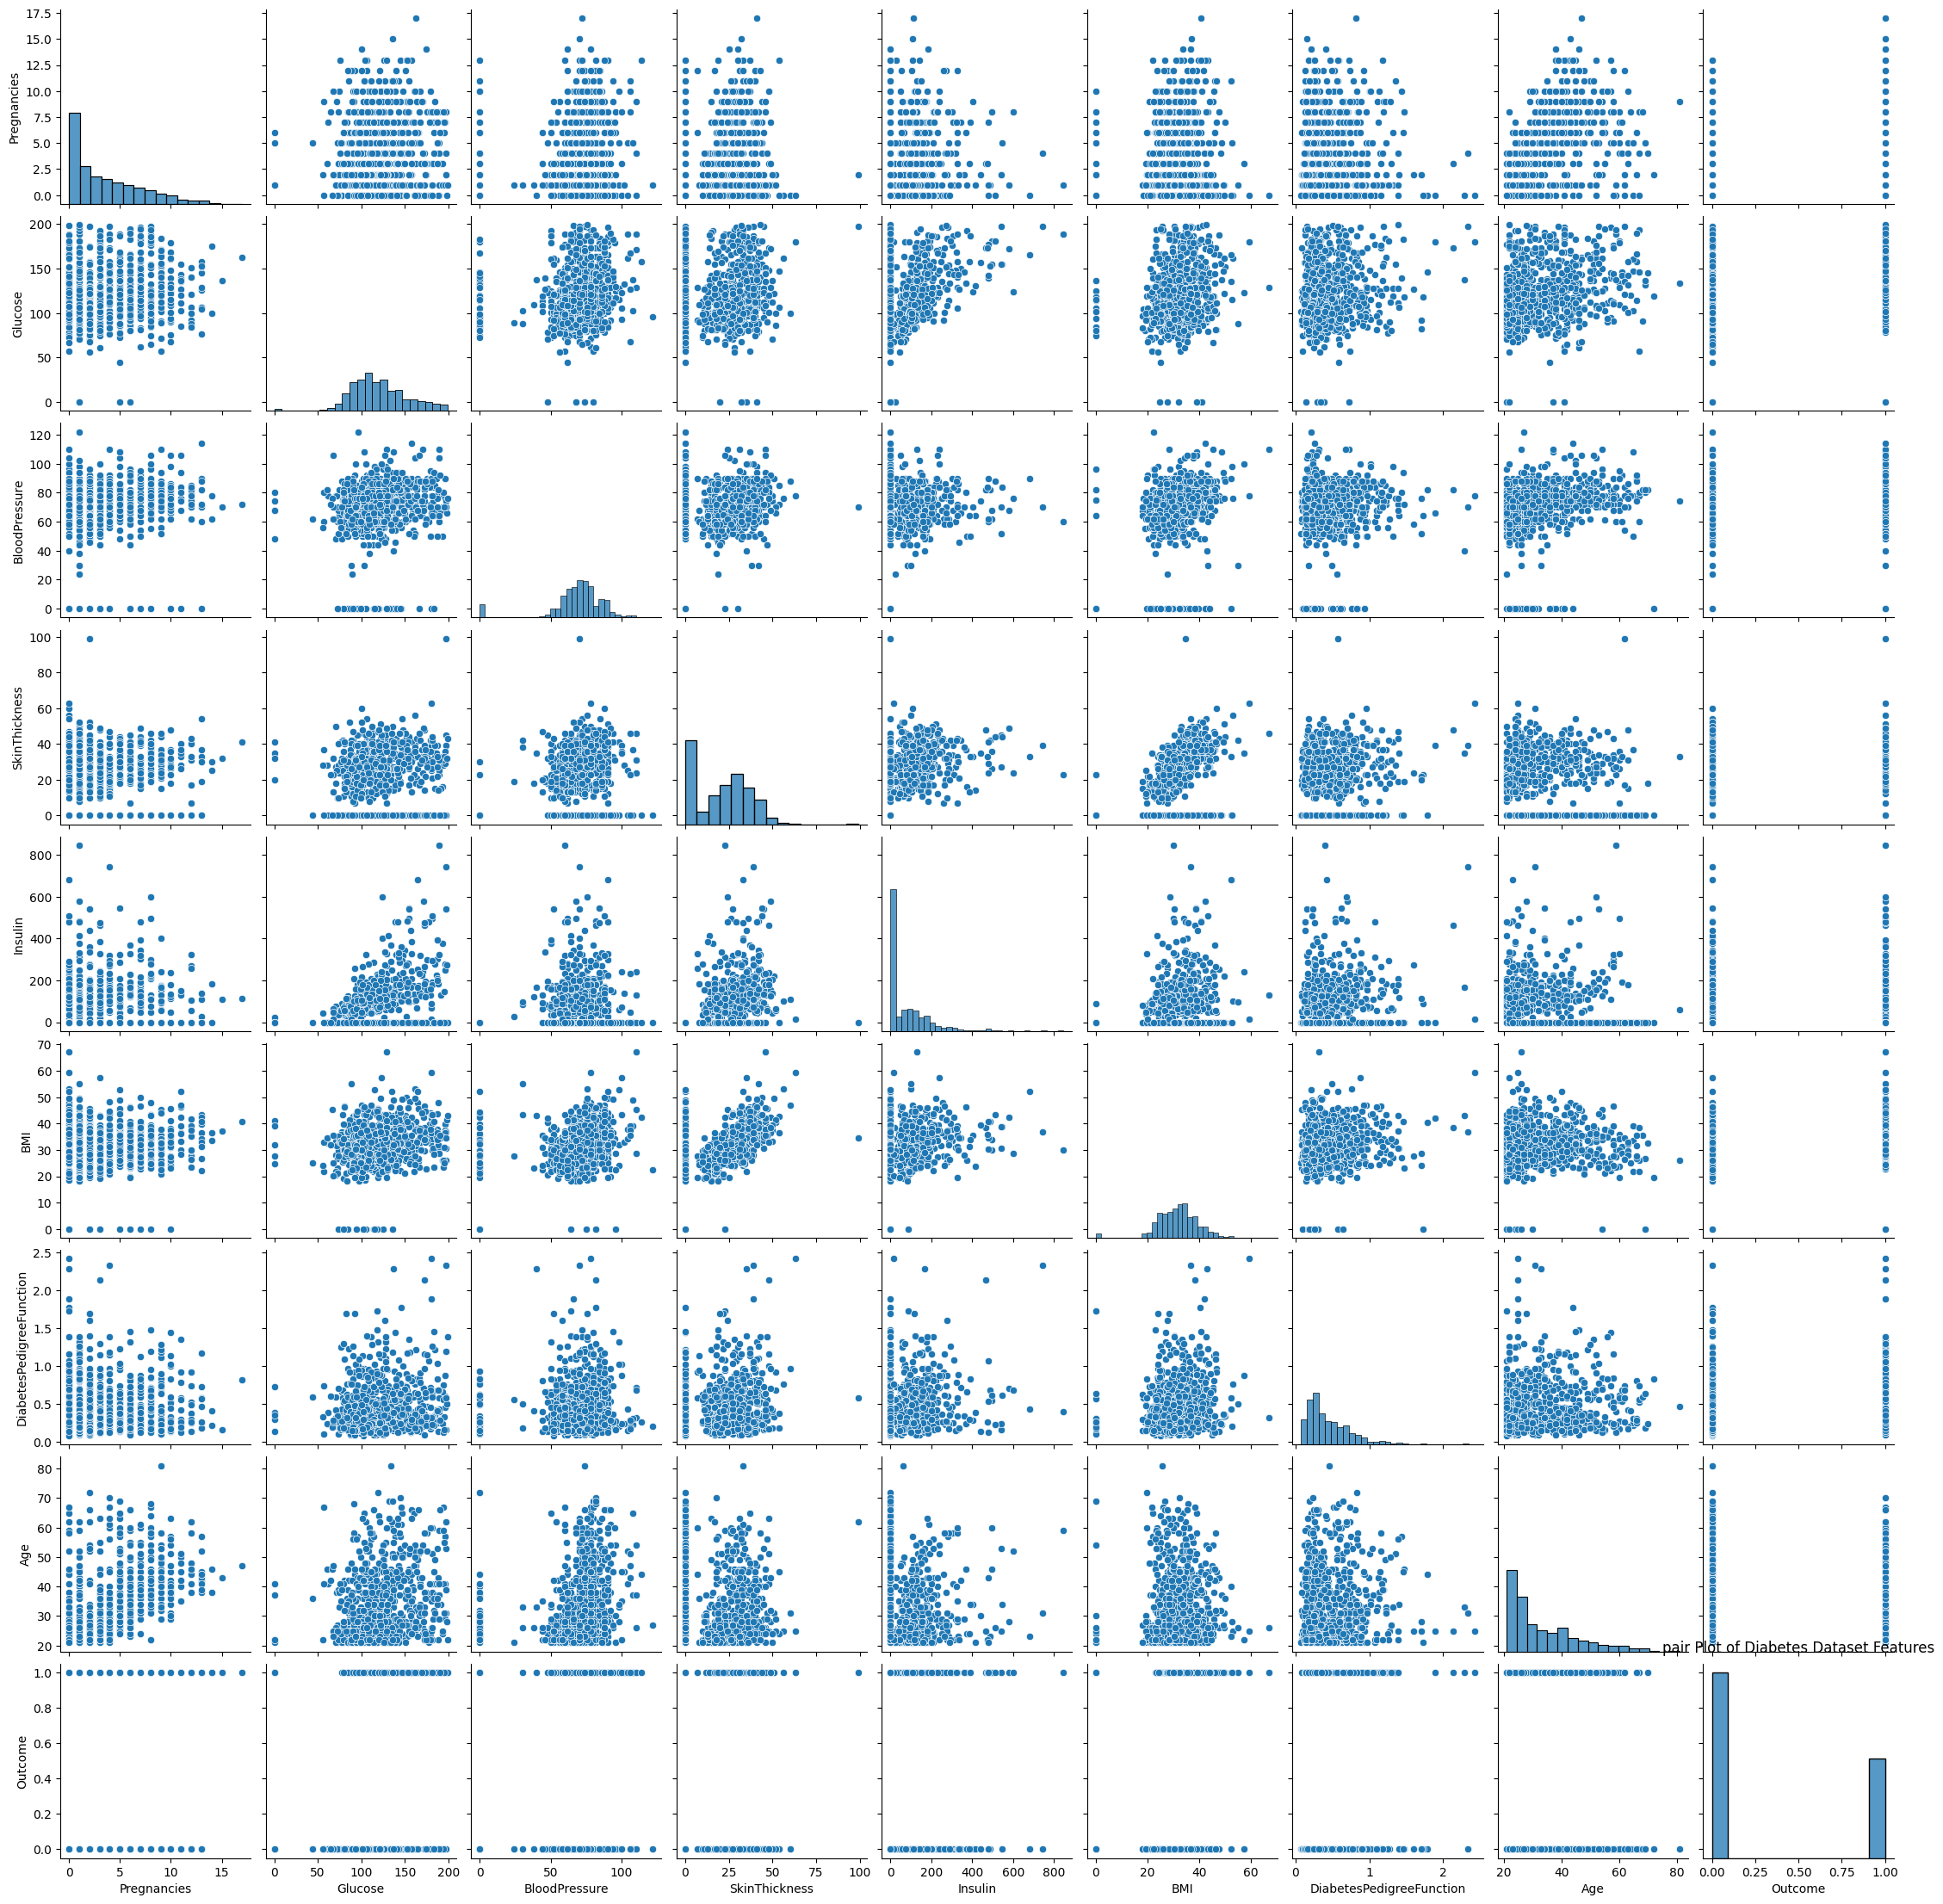

In [11]:
#Visualization of Pairplot
sns.pairplot(df)
plt.title('pair Plot of Diabetes Dataset Features',y=1.02)
plt.show()

In [12]:
columns_to_impute = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']#
for col in columns_to_impute:
  median_val = df[df[col] != 0][col].median()
  df[col] = df[col].replace(0,median_val)
print("Descriptive satistics after imputing '0' values:")
df.describe()

Descriptive satistics after imputing '0' values:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [13]:
#Building a Logistic Model i.e Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,auc,roc_curve


In [14]:
X_test,X_train,y_test,y_train = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=42)

In [15]:
#Splitting data into training and Testing
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (154, 8)
X_test (614, 8)
y_train (154,)
y_test (614,)


In [16]:
model = LogisticRegression(solver='liblinear',random_state = 42)
model.fit(X_train,y_train)



LogisticRegression(random_state=42, solver='liblinear')

In [17]:

#model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7280
Precision: 0.6322
Recall: 0.5164
F1-Score: 0.5685
ROC-AUC Score: 0.7351


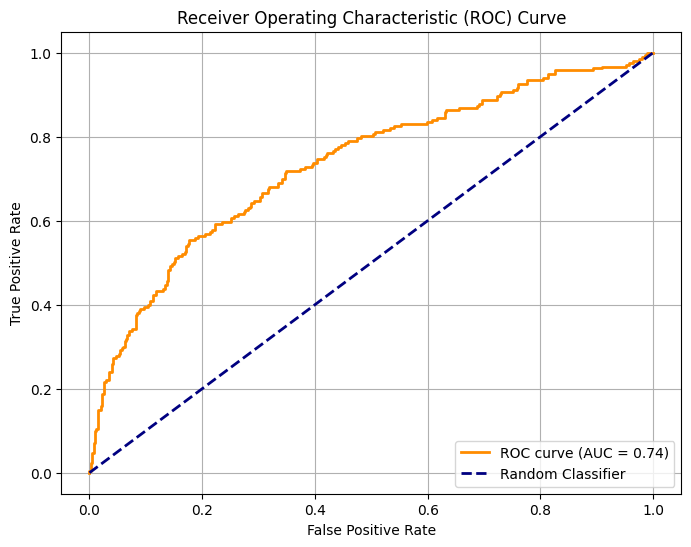

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#calculate the area under the curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [19]:
#Interpretation
print(f"Intercept: {model.intercept_[0]:.4f}")

coefficients = pd.Series(model.coef_[0], index=X_train.columns)
print("Coefficients:")
print(coefficients)

Intercept: -2.5471
Coefficients:
Pregnancies                 0.291728
Glucose                     0.035725
BloodPressure              -0.039483
SkinThickness              -0.001260
Insulin                    -0.000666
BMI                         0.021043
DiabetesPedigreeFunction    1.251196
Age                        -0.057451
dtype: float64


Interview Questions:
1. What is the difference between precision and recall?



Precision : It's Ratio of true positive (Correctly predicted positive instances) to the sum of true postives and false positives( incorrectly predicted positive intances)

Recall: It's ratio of true positives to the sum of true postives and false negatives(missed positive instances)

2. What is cross-validation, and why is it important in binary classification?

It is a technique thats splits the dataset into multiple subsets(folds) to repeatedly train and test the model to evaluate the perfomance of model.

It's Importance in Binary classification:

1. It reduces the overfitting.
2. provides the more accurate model performance
3. also helps in hyperparameter tuning.